In [6]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from load_util import load_util
from plot_util import plot_util
from pred_util import pred_util
import os

data_folder = os.path.join('..', 'data')
file_name = "Full_prem"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
#Run this to create a new data file
leagues = ['E0']
start_year, end_year = 2020, 2025
load_util.fetch_data_into_file(data_folder=data_folder, file_name=file_name, start_year=start_year, end_year=end_year, leagues=leagues)

Data fetched and saved to ../data/Full_prem.csv


In [14]:
data = load_util.load_data(data_folder, file_name)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,PSH,PSD,PSA
0,E0,2020-09-12,Fulham,Arsenal,0,3,A,0,1,A,...,12,2,3,2,2,0,0,6.16,4.51,1.56
1,E0,2020-09-12,Crystal Palace,Southampton,1,0,H,1,0,H,...,11,7,3,2,1,0,0,3.32,3.29,2.40
2,E0,2020-09-12,Liverpool,Leeds,4,3,H,3,2,H,...,6,9,0,1,0,0,0,1.31,6.25,9.92
3,E0,2020-09-12,West Ham,Newcastle,0,2,A,0,0,D,...,7,8,7,2,2,0,0,2.18,3.61,3.50
4,E0,2020-09-13,West Brom,Leicester,0,3,A,0,0,D,...,9,2,5,1,1,0,0,4.00,3.59,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,E0,2024-10-19,Southampton,Leicester,2,3,A,2,0,H,...,10,10,6,5,3,1,0,2.34,3.53,3.09
1596,E0,2024-10-19,Bournemouth,Arsenal,2,0,H,0,0,D,...,11,7,4,1,1,0,1,5.01,4.13,1.68
1597,E0,2024-10-20,Wolves,Man City,1,2,A,1,1,D,...,5,1,18,4,1,0,0,9.01,5.92,1.32
1598,E0,2024-10-20,Liverpool,Chelsea,2,1,H,1,0,H,...,13,1,6,4,3,0,0,1.62,4.47,5.08


In [15]:
all_teams = load_util.get_all_teams(data)
ELO = pred_util.ELO(init_rating=1500, teams=all_teams, k_factor=32, draw_factor=0.25, home_advantage=100)
ELO_predictions = ELO.perform_simulations(data)
data_with_probs = ELO.get_probabilities(ELO_predictions)
pred_util.evaluate_probability_prediction(data_with_probs)

0.534375

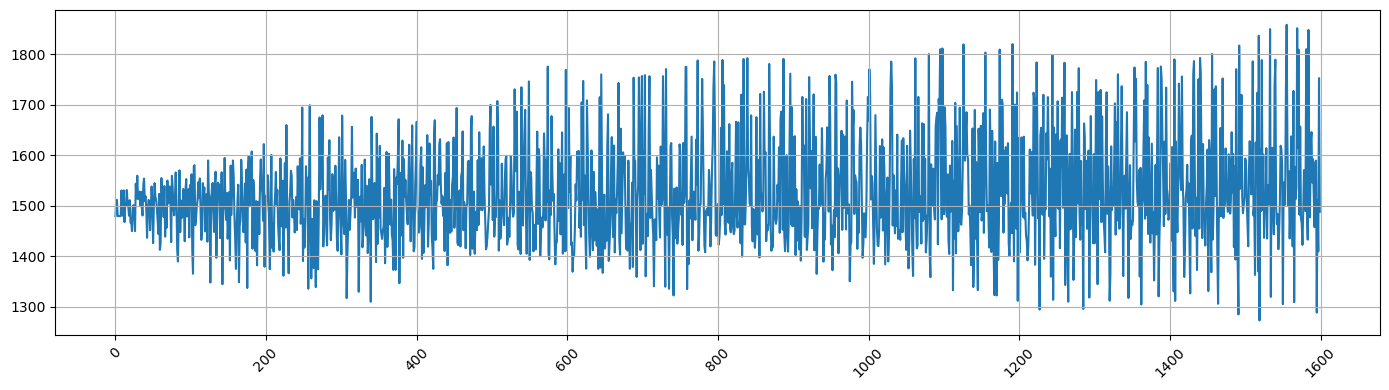

In [17]:
plot_util.plot_series(data_with_probs['Home ELO'], figsize=figsize)